# Introduction

Name : Fitrasari Fasyah

Batch : 006

# Objectives

**Problem Statement**

Nowadays, social media is a big part of our life. There are so much benefit we can get when using social media, but it doesn't mean that all the contents in social media are all good or positive. As social media take a big part of our life, sometimes the content in it can also affect our life. Positive content can make our life better and also positive, but the negative content can make us negative too.  One of social media application that widely used in the world is Twitter. Some tweet by the twitter user might be positive or negative, so in this project i will do sentiment analysis to the tweets and determine is the tweet positive or negative using NLP with LSTM.

**Objective**

    - Decide the best model to determine whether the sentence(s) is Positive or Negative sentence

# Library Import

In [2]:
import pandas as pd
import tensorflow as tf
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

import nltk 
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from keras.preprocessing.text import Tokenizer
from tensorflow.keras import layers

import re
import random
import matplotlib.pyplot as plt 
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout, BatchNormalization
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from tensorflow.keras.callbacks import ReduceLROnPlateau

import warnings
warnings.filterwarnings("ignore")

In [3]:
physical_devices = tf.config.list_physical_devices('GPU') 
for device in physical_devices:
    tf.config.experimental.set_memory_growth(device, True)

# Data Loading

For this project, i will use a dataset i got from kaggle. The dataset can be downloaded here https://www.kaggle.com/kazanova/sentiment140

In [4]:
df = pd.read_csv('training.1600000.processed.noemoticon.csv')
df

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...,...
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


# EDA

**Dataset Overview :**

This is the sentiment140 dataset. It contains 1,600,000 tweets extracted using the twitter api . The tweets have been annotated (0 = negative, 4 = positive) and they can be used to detect sentiment .

**Content :**

It contains the following 6 fields:

    1. target: the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)

    2. ids: The id of the tweet ( 2087)

    3. date: the date of the tweet (Sat May 16 23:58:44 UTC 2009)

    4. flag: The query (lyx). If there is no query, then this value is NO_QUERY.

    5. user: the user that tweeted (robotickilldozr)

    6. text: the text of the tweet (Lyx is cool)

 ### Exploring the Basic

In [4]:
# Take a glance at the dataset
df.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [5]:
# Dataset Shape
df.shape

(1599999, 6)

In [6]:
# Columns exist in dataset
df.columns

Index(['0', '1467810369', 'Mon Apr 06 22:19:45 PDT 2009', 'NO_QUERY',
       '_TheSpecialOne_',
       '@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D'],
      dtype='object')

In [5]:
# Rename columns
df = df.rename(columns={'0': 'label', '1467810369': 'id',
                        'Mon Apr 06 22:19:45 PDT 2009': 'date', 
                        'NO_QUERY': 'query', '_TheSpecialOne_': 'username',
                        "@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D": 'content'})
df.head(1)

,label,id,date,query,username,content
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...


In [8]:
# Check the dataset info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   label     1599999 non-null  int64 
 1   id        1599999 non-null  int64 
 2   date      1599999 non-null  object
 3   query     1599999 non-null  object
 4   username  1599999 non-null  object
 5   content   1599999 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [9]:
# Is there any missing values ?
df.isnull().sum()

label       0
id          0
date        0
query       0
username    0
content     0
dtype: int64

In [10]:
# Is there any duplicate data entries ?
df.duplicated().sum()

0

In [11]:
# Check the label value counts
df.label.value_counts()

4    800000
0    799999
Name: label, dtype: int64

Insight :

    - There are 1599999 data entries with 5 features and 1 label/target
    - We have 2 numerical data and 3 non-numerical data in this dataset
    - There are no missing values nor duplicated values
    - We have 2 labels in this dataset, 0 and 4

### Label Data Distribution

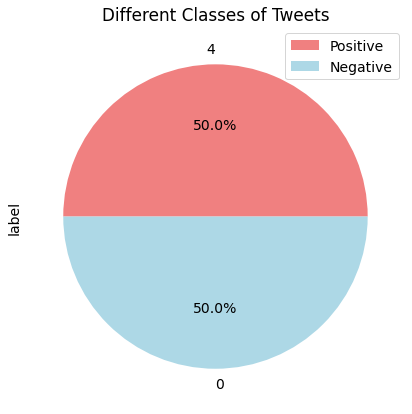

In [12]:
plt.rcParams['font.size'] = '14'
df['label'].value_counts().plot(kind='pie', autopct = '%1.1f%%', figsize = (7,7), colors = ('lightcoral', 'lightblue'))
plt.title("Different Classes of Tweets")
cls = ['Positive', 'Negative']
plt.legend(cls)
plt.show()

Insight :

    - From the plot, we can say that this dataset is balance. It's 50 - 50 between the positive and nehative label

### Length of the tweet

In [13]:
# Add new column with lenght of the tweet
df['length'] = df.content.str.split().apply(len)
df.head(1)

,label,id,date,query,username,content,length
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,21


In [14]:
print("Minimum length of tweet :", df['length'].min())
print("Maximum length of tweet :", df['length'].max())
print("Mean length of tweet :", df['length'].mean())

Minimum length of tweet : 1
Maximum length of tweet : 64
Mean length of tweet : 13.175500109687569


**POSITIVE TWEETS**

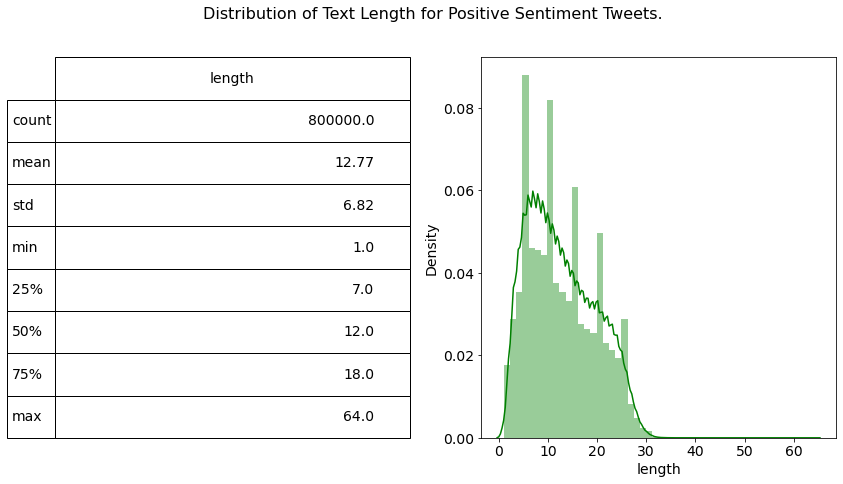

In [15]:
fig = plt.figure(figsize=(14,7))

ax1 = fig.add_subplot(122)
sns.distplot(df[df['label']==4]['length'], ax=ax1,color='green')
describe = df.length[df.label==4].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of Text Length for Positive Sentiment Tweets.', fontsize=16)

plt.show()

**NEGATIVE TWEETS**

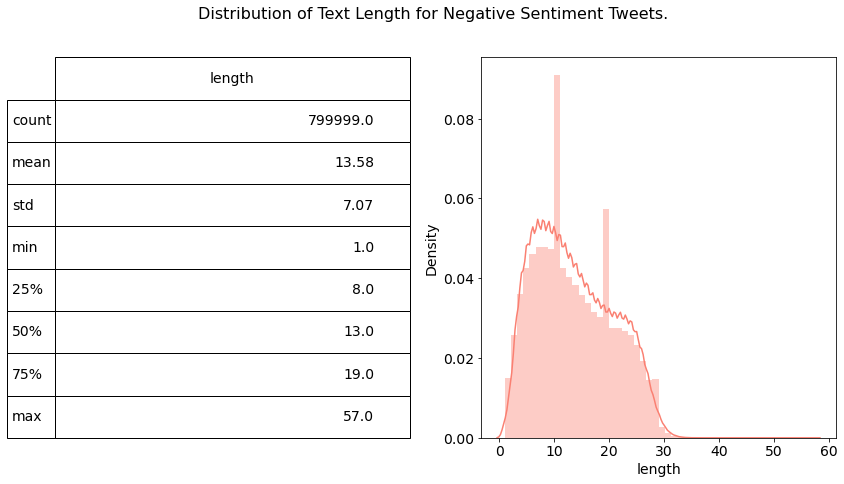

In [16]:
fig = plt.figure(figsize=(14,7))

ax1 = fig.add_subplot(122)
sns.distplot(df[df['label']==0]['length'], ax=ax1,color='salmon')
describe = df.length[df.label==0].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of Text Length for Negative Sentiment Tweets.', fontsize=16)

plt.show()

Insight :

    - The maximum lenght of the tweet is 64
    - The average length of the tweet is about 14
    - The distribution of tweet length in Positive and Negative tweet are about the same

### Most Commonly Tweeting User

**POSITIVE TWEETS**

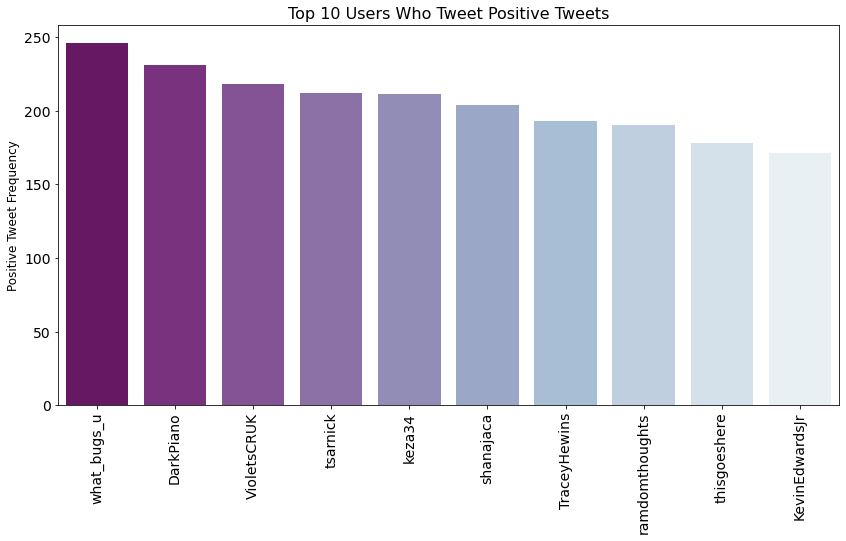

In [17]:
plt.figure(figsize=(14,7))
common_keyword=sns.barplot(x=df[df['label']==4]['username'].value_counts()[:10].index, \
                           y=df[df['label']==4]['username'].value_counts()[:10],palette='BuPu_r')
common_keyword.set_xticklabels(common_keyword.get_xticklabels(),rotation=90)
common_keyword.set_ylabel('Positive Tweet Frequency',fontsize=12)
plt.title('Top 10 Users Who Tweet Positive Tweets',fontsize=16)
plt.show()

**NEGATIVE TWEETS**

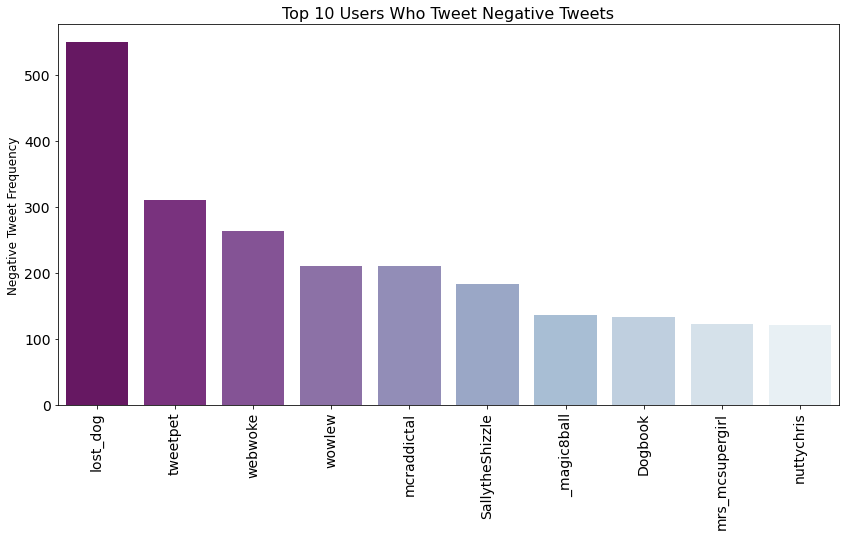

In [18]:
plt.figure(figsize=(14,7))
common_keyword=sns.barplot(x=df[df['label']==0]['username'].value_counts()[:10].index, \
                           y=df[df['label']==0]['username'].value_counts()[:10],palette='BuPu_r')
common_keyword.set_xticklabels(common_keyword.get_xticklabels(),rotation=90)
common_keyword.set_ylabel('Negative Tweet Frequency',fontsize=12)
plt.title('Top 10 Users Who Tweet Negative Tweets',fontsize=16)
plt.show()

Insight :

    - The user who tweet positive tweets the most is user 'what_bugs_u'
    - The user who tweet negative tweets the most is user 'lost_dog'

### WordClouds

**POSITIVE TWEETS WORDCLOUDS**

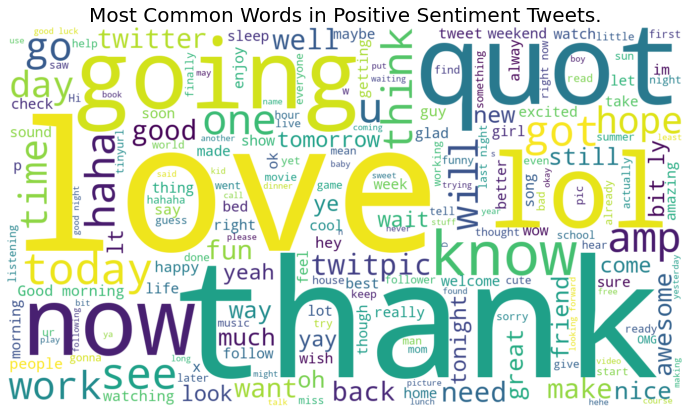

In [19]:
plt.figure(figsize=(14,7))
word_cloud = WordCloud(stopwords = STOPWORDS, max_words = 200, width=1366, height=768, background_color="white").generate(" ".join(df[df.label==4].content))
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Positive Sentiment Tweets.',fontsize=20)
plt.show()

**NEGATIVE TWEETS WORDCLOUDS**

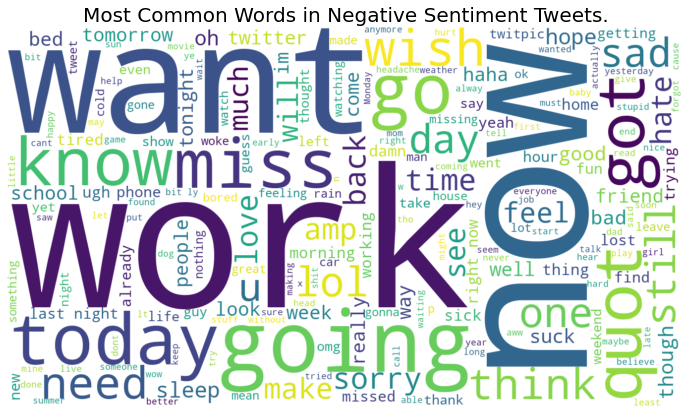

In [20]:
plt.figure(figsize=(14,7))
word_cloud = WordCloud(stopwords = STOPWORDS, max_words = 200, width=1366, height=768, background_color="white").generate(" ".join(df[df.label==0].content))
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Negative Sentiment Tweets.',fontsize=20)
plt.show()

# Data Preprocessing

In [6]:
# Keep only the necessary columns

df = df[['label', 'content']]
df

,label,content
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew
...,...,...
1599994,4,Just woke up. Having no school is the best fee...
1599995,4,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,Happy 38th Birthday to my boo of alll time!!! ...


In [7]:
# Replace label to Positive and Negative

df['label']= df['label'].replace([4], 1)
df

,label,content
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew
...,...,...
1599994,1,Just woke up. Having no school is the best fee...
1599995,1,TheWDB.com - Very cool to hear old Walt interv...
1599996,1,Are you ready for your MoJo Makeover? Ask me f...
1599997,1,Happy 38th Birthday to my boo of alll time!!! ...


### Stemming

Stemming - it does refers to the process which goal is to reduce words into thier base form. In case of our problem for classification it is very important ooperation as we need to focus on the meaning of particular word. For instance words: Running, Runned, Runner all can reduce to the stem Run. Below we have used the base of english stopwords and stemming algorithm from nltk library.

In [8]:
#base of english stopwords
english_stopwords = stopwords.words('english')

#stemming algorithm
stemmer = SnowballStemmer('english')

#regex for mentions and links in tweets
regex = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [9]:
def preprocess(content, stem=False):
  content = re.sub(regex, ' ', str(content).lower()).strip()
  tokens = []
  for token in content.split():
    if token not in english_stopwords:
      tokens.append(stemmer.stem(token))
  return " ".join(tokens)

In [10]:
df.content = df.content.apply(lambda x: preprocess(x))

In [11]:
df.head()

,label,content
0,0,upset updat facebook text might cri result sch...
1,0,dive mani time ball manag save 50 rest go bound
2,0,whole bodi feel itchi like fire
3,0,behav mad see
4,0,whole crew


### Split into Train and Test Set

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df.content, df.label, test_size=0.1, random_state = 16, stratify = df.label)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(1439999,) (160000,)
(1439999,) (160000,)


### Split Train set to Train and Validation Set

In [13]:
X_train, X_val, y_train, y_val = train_test_split(X_train,
                                                    y_train,
                                                    test_size=0.2, random_state = 16, stratify = y_train)

print (X_train.shape, X_test.shape, X_val.shape)
print (y_train.shape, y_test.shape, y_val.shape)

(1151999,) (160000,) (288000,)
(1151999,) (160000,) (288000,)


### Encode the Target

In [14]:
encoder = LabelEncoder()
encoder.fit(y_train)

y_train = encoder.transform(y_train)
y_test = encoder.transform(y_test)
y_val = encoder.transform(y_val)

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)
y_val = y_val.reshape(-1,1)

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
print("y_val shape:", y_val.shape)

y_train shape: (1151999, 1)
y_test shape: (160000, 1)
y_val shape: (288000, 1)


### Tokenization / Vectorization

It is a particular kind of document segmentation. It does breaks up text into smaller chunks or segments called tokens. A tokenizer breaks unstructured data, natural language text, into chunks of information that can be counted as discrete elements. After this operation these counts of token occurences in particular document can be used as a vector representing given document.

In [15]:
# setup text vect
max_vocab_length = 100000
max_length = 30

text_vectorization = TextVectorization(max_tokens=max_vocab_length,
                                       standardize="lower_and_strip_punctuation",
                                       split="whitespace",
                                       ngrams=None,
                                       output_mode='int',
                                       output_sequence_length=max_length)

In [16]:
text_vectorization.adapt(X_train)

In [50]:
import pickle
pickle.dump({'config': text_vectorization.get_config(),
             'weights': text_vectorization.get_weights()}
            , open("txtvect.pkl", "wb"))

# Modelling

### Embedding Layer

In [17]:
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length,
                             output_dim=128,
                             embeddings_initializer="uniform",
                             input_length=max_length)

embedding

In [53]:
embedding_weights = embedding.get_weights()
pickle.dump(embedding_weights,open('embedding.pkl','wb'))

### Pipeline

In [18]:
train = tf.data.Dataset.from_tensor_slices((X_train,y_train)).shuffle(100).batch(50)
test = tf.data.Dataset.from_tensor_slices((X_test,y_test)).shuffle(100).batch(50)
val = tf.data.Dataset.from_tensor_slices((X_val,y_val)).shuffle(100).batch(50)

### Base Model

**LSTM**

In [34]:
inputs = layers.Input(shape=(1,), dtype='string')
x = text_vectorization(inputs)
x = embedding(x)
x = layers.LSTM(64)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
base = tf.keras.Model(inputs, outputs, name="LSTM_base")

In [35]:
base.summary()

Model: "LSTM_base"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 30)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 30, 128)           12800000  
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 12,849,473
Trainable params: 12,849,473
Non-trainable params: 0
_____________________________________________

In [36]:
base.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [37]:
base_hist = base.fit(train,
                           epochs=10,
                           validation_data=val, batch_size = 100)

Epoch 1/10
23040/23040 [==============================] - 383s 17ms/step - loss: 0.4726 - accuracy: 0.7733 - val_loss: 0.4553 - val_accuracy: 0.7839
Epoch 2/10
23040/23040 [==============================] - 375s 16ms/step - loss: 0.4277 - accuracy: 0.8008 - val_loss: 0.4589 - val_accuracy: 0.7847
Epoch 3/10
23040/23040 [==============================] - 379s 16ms/step - loss: 0.3900 - accuracy: 0.8225 - val_loss: 0.4811 - val_accuracy: 0.7789
Epoch 4/10
23040/23040 [==============================] - 375s 16ms/step - loss: 0.3492 - accuracy: 0.8437 - val_loss: 0.5282 - val_accuracy: 0.7691
Epoch 5/10
23040/23040 [==============================] - 365s 16ms/step - loss: 0.3152 - accuracy: 0.8600 - val_loss: 0.5904 - val_accuracy: 0.7633
Epoch 6/10
23040/23040 [==============================] - 373s 16ms/step - loss: 0.2901 - accuracy: 0.8715 - val_loss: 0.6334 - val_accuracy: 0.7567
Epoch 7/10
23040/23040 [==============================] - 372s 16ms/step - loss: 0.2706 - accuracy: 0.8805

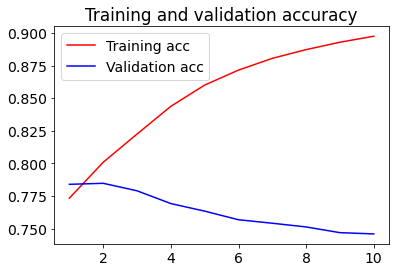

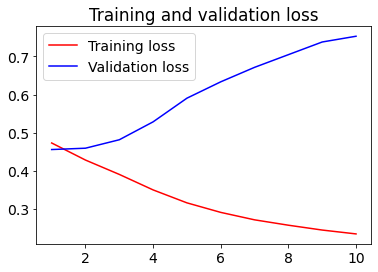

In [38]:
# Visualize accuracy and loss for train and validation data

acc = base_hist.history['accuracy']
val_acc = base_hist.history['val_accuracy']
loss = base_hist.history['loss']
val_loss = base_hist.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')
plt.legend()

plt.show()

In [39]:
base.evaluate(X_test, y_test)

5000/5000 [==============================] - 19s 4ms/step - loss: 0.7551 - accuracy: 0.7466


[0.7551447153091431, 0.7465562224388123]

In [40]:
base.evaluate(X_val, y_val)

9000/9000 [==============================] - 33s 4ms/step - loss: 0.7532 - accuracy: 0.7459


[0.7531684637069702, 0.7458750009536743]

In [41]:
res = base.predict(X_test)

tres = 0.5
res = (res > tres)
res = res.astype(int)
res

array([[0],
       [0],
       [1],
       ...,
       [1],
       [1],
       [0]])

In [42]:
print(classification_report(y_test, res))

              precision    recall  f1-score   support

           0       0.76      0.72      0.74     80000
           1       0.73      0.77      0.75     80000

    accuracy                           0.75    160000
   macro avg       0.75      0.75      0.75    160000
weighted avg       0.75      0.75      0.75    160000



## Optimization

### Model 1

In [43]:
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorization(inputs)
x = embedding(x)
x = layers.Bidirectional(LSTM(64, return_sequences=True))(x)
x = layers.Dropout(0.2)(x)
x = layers.Bidirectional(LSTM(32))(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(16, activation='relu')(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model_1 = tf.keras.Model(inputs, outputs, name='model_1')

In [44]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 30)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 30, 128)           12800000  
                                                                 
 bidirectional (Bidirectiona  (None, 30, 128)          98816     
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 30, 128)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               4121

In [45]:
model_1.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001), metrics=['accuracy'])

history = model_1.fit(train, batch_size = 100, epochs=10, validation_data=val)

Epoch 1/10
23040/23040 [==============================] - 578s 25ms/step - loss: 0.4785 - accuracy: 0.7748 - val_loss: 0.4798 - val_accuracy: 0.7713
Epoch 2/10
23040/23040 [==============================] - 589s 26ms/step - loss: 0.4431 - accuracy: 0.7925 - val_loss: 0.4753 - val_accuracy: 0.7748
Epoch 3/10
23040/23040 [==============================] - 587s 25ms/step - loss: 0.4279 - accuracy: 0.8017 - val_loss: 0.4770 - val_accuracy: 0.7749
Epoch 4/10
23040/23040 [==============================] - 588s 26ms/step - loss: 0.4167 - accuracy: 0.8082 - val_loss: 0.4800 - val_accuracy: 0.7745
Epoch 5/10
23040/23040 [==============================] - 579s 25ms/step - loss: 0.4080 - accuracy: 0.8131 - val_loss: 0.4833 - val_accuracy: 0.7743
Epoch 6/10
23040/23040 [==============================] - 578s 25ms/step - loss: 0.4002 - accuracy: 0.8175 - val_loss: 0.4868 - val_accuracy: 0.7735
Epoch 7/10
23040/23040 [==============================] - 583s 25ms/step - loss: 0.3937 - accuracy: 0.8214

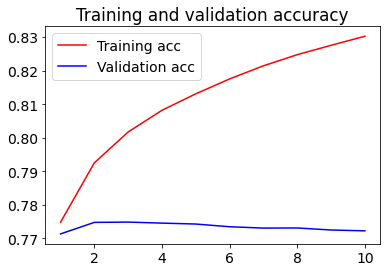

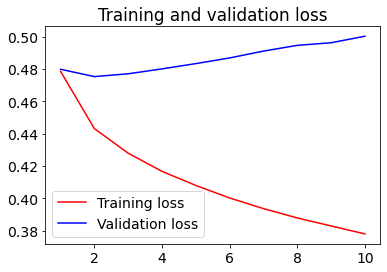

In [46]:
# Visualize accuracy and loss for train and validation data

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')
plt.legend()

plt.show()

In [47]:
model_1.evaluate(X_test, y_test)

5000/5000 [==============================] - 34s 7ms/step - loss: 0.4991 - accuracy: 0.7723


[0.4991486668586731, 0.7722874879837036]

In [48]:
model_1.evaluate(X_val, y_val)

9000/9000 [==============================] - 59s 7ms/step - loss: 0.5002 - accuracy: 0.7722


[0.5001879930496216, 0.7722465395927429]

In [49]:
res1 = model_1.predict(X_test)

tres = 0.5
res1 = (res1 > tres)
res1 = res1.astype(int)
res1

array([[0],
       [0],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [50]:
print(classification_report(y_test, res1))

              precision    recall  f1-score   support

           0       0.79      0.74      0.77     80000
           1       0.76      0.80      0.78     80000

    accuracy                           0.77    160000
   macro avg       0.77      0.77      0.77    160000
weighted avg       0.77      0.77      0.77    160000



### Model 2

In [51]:
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorization(inputs)
x = embedding(x)
x = SpatialDropout1D(0.2)(x)
x = Conv1D(64, 5, activation='relu')(x)
x = Bidirectional(LSTM(64, dropout=0.2))(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(64, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)
model_2 = tf.keras.Model(inputs, outputs, name='model_2') 

In [52]:
model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 30)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 30, 128)           12800000  
                                                                 
 spatial_dropout1d (SpatialD  (None, 30, 128)          0         
 ropout1D)                                                       
                                                                 
 conv1d (Conv1D)             (None, 26, 64)            41024     
                                                                 
 bidirectional_2 (Bidirectio  (None, 128)              6604

In [53]:
model_2.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001), metrics=['accuracy'])

history2 = model_2.fit(train, batch_size = 100, epochs=10, validation_data=val)

Epoch 1/10
23040/23040 [==============================] - 586s 25ms/step - loss: 0.4846 - accuracy: 0.7678 - val_loss: 0.4727 - val_accuracy: 0.7748
Epoch 2/10
23040/23040 [==============================] - 573s 25ms/step - loss: 0.4480 - accuracy: 0.7899 - val_loss: 0.4681 - val_accuracy: 0.7780
Epoch 3/10
23040/23040 [==============================] - 575s 25ms/step - loss: 0.4372 - accuracy: 0.7956 - val_loss: 0.4668 - val_accuracy: 0.7797
Epoch 4/10
23040/23040 [==============================] - 575s 25ms/step - loss: 0.4297 - accuracy: 0.8002 - val_loss: 0.4656 - val_accuracy: 0.7810
Epoch 5/10
23040/23040 [==============================] - 576s 25ms/step - loss: 0.4230 - accuracy: 0.8044 - val_loss: 0.4673 - val_accuracy: 0.7807
Epoch 6/10
23040/23040 [==============================] - 577s 25ms/step - loss: 0.4184 - accuracy: 0.8074 - val_loss: 0.4680 - val_accuracy: 0.7814
Epoch 7/10
23040/23040 [==============================] - 579s 25ms/step - loss: 0.4144 - accuracy: 0.8097

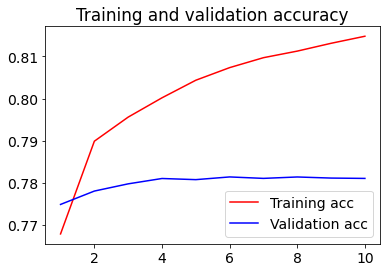

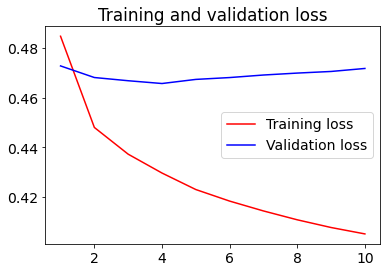

In [54]:
# Visualize accuracy and loss for train and validation data

acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')
plt.legend()

plt.show()

In [55]:
model_2.evaluate(X_test, y_test)

5000/5000 [==============================] - 23s 5ms/step - loss: 0.4702 - accuracy: 0.7820


[0.4701864719390869, 0.7819812297821045]

In [56]:
model_2.evaluate(X_val, y_val)

9000/9000 [==============================] - 41s 5ms/step - loss: 0.4717 - accuracy: 0.7810


[0.4716963469982147, 0.7810277938842773]

In [57]:
res2 = model_2.predict(X_test)

tres = 0.5
res2 = (res2 > tres)
res2 = res2.astype(int)
res2

array([[0],
       [0],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [58]:
print(classification_report(y_test, res2))

              precision    recall  f1-score   support

           0       0.80      0.75      0.78     80000
           1       0.77      0.81      0.79     80000

    accuracy                           0.78    160000
   macro avg       0.78      0.78      0.78    160000
weighted avg       0.78      0.78      0.78    160000



### Model 3

In [59]:
model_3 = Sequential([
        tf.keras.layers.Input(shape=(1,), dtype="string"),
        text_vectorization,
        embedding,
        tf.keras.layers.Bidirectional(LSTM(128, return_sequences=True)),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Bidirectional(LSTM(128)),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(1, activation='sigmoid'),
    ])

In [60]:
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 30)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 30, 128)           12800000  
                                                                 
 bidirectional_3 (Bidirectio  (None, 30, 256)          263168    
 nal)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 30, 256)           0         
                                                                 
 batch_normalization (BatchN  (None, 30, 256)          1024      
 ormalization)                                                   
                                                        

In [61]:
model_3.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001), metrics=['accuracy'])

history3 = model_3.fit(train, batch_size = 100, epochs=10, validation_data=val)

Epoch 1/10
23040/23040 [==============================] - 1146s 50ms/step - loss: 0.4633 - accuracy: 0.7832 - val_loss: 0.4873 - val_accuracy: 0.7712
Epoch 2/10
23040/23040 [==============================] - 1066s 46ms/step - loss: 0.4118 - accuracy: 0.8110 - val_loss: 0.4940 - val_accuracy: 0.7708
Epoch 3/10
23040/23040 [==============================] - 1070s 46ms/step - loss: 0.3927 - accuracy: 0.8214 - val_loss: 0.5025 - val_accuracy: 0.7697
Epoch 4/10
23040/23040 [==============================] - 1069s 46ms/step - loss: 0.3795 - accuracy: 0.8292 - val_loss: 0.5097 - val_accuracy: 0.7699
Epoch 5/10
23040/23040 [==============================] - 1071s 46ms/step - loss: 0.3698 - accuracy: 0.8346 - val_loss: 0.5169 - val_accuracy: 0.7706
Epoch 6/10
23040/23040 [==============================] - 1079s 47ms/step - loss: 0.3612 - accuracy: 0.8396 - val_loss: 0.5264 - val_accuracy: 0.7686
Epoch 7/10
23040/23040 [==============================] - 1079s 47ms/step - loss: 0.3539 - accuracy:

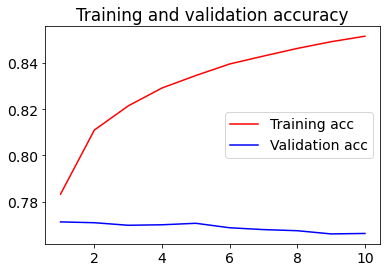

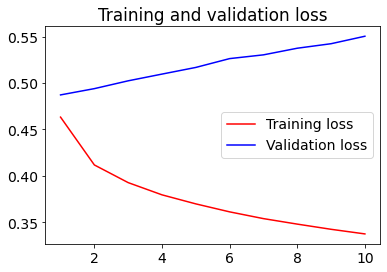

In [62]:
# Visualize accuracy and loss for train and validation data

acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']
loss = history3.history['loss']
val_loss = history3.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')
plt.legend()

plt.show()

In [63]:
model_3.evaluate(X_test, y_test)

5000/5000 [==============================] - 90s 18ms/step - loss: 0.5492 - accuracy: 0.7661


[0.5491650104522705, 0.7660687565803528]

In [64]:
model_3.evaluate(X_val, y_val)

9000/9000 [==============================] - 163s 18ms/step - loss: 0.5505 - accuracy: 0.7662


[0.5504966378211975, 0.7661562561988831]

In [65]:
res3 = model_3.predict(X_test)

tres = 0.5
res3 = (res3 > tres)
res3 = res3.astype(int)
res3

array([[0],
       [0],
       [1],
       ...,
       [1],
       [1],
       [0]])

In [66]:
print(classification_report(y_test, res3))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76     80000
           1       0.76      0.78      0.77     80000

    accuracy                           0.77    160000
   macro avg       0.77      0.77      0.77    160000
weighted avg       0.77      0.77      0.77    160000



### Model 4

In [67]:
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorization(inputs)
x = embedding(x)
x = SpatialDropout1D(0.2)(x)
x = Conv1D(64, 5, activation='selu')(x)
x = Bidirectional(LSTM(64, dropout=0.2))(x)
x = Dense(128, activation='selu')(x)
x = Dropout(0.2)(x)
x = Dense(64, activation='selu')(x)
outputs = Dense(1, activation='sigmoid')(x)
model_4 = tf.keras.Model(inputs, outputs, name='model_4') 

In [68]:
model_4.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 30)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 30, 128)           12800000  
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 30, 128)          0         
 lDropout1D)                                                     
                                                                 
 conv1d_1 (Conv1D)           (None, 26, 64)            41024     
                                                                 
 bidirectional_5 (Bidirectio  (None, 128)              6604

In [69]:
model_4.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001), metrics=['accuracy'])

history4 = model_4.fit(train, batch_size = 64, epochs=10, validation_data=val)

Epoch 1/10
23040/23040 [==============================] - 861s 37ms/step - loss: 0.4759 - accuracy: 0.7731 - val_loss: 0.4776 - val_accuracy: 0.7736
Epoch 2/10
23040/23040 [==============================] - 714s 31ms/step - loss: 0.4428 - accuracy: 0.7930 - val_loss: 0.4721 - val_accuracy: 0.7778
Epoch 3/10
23040/23040 [==============================] - 704s 31ms/step - loss: 0.4314 - accuracy: 0.7997 - val_loss: 0.4710 - val_accuracy: 0.7793
Epoch 4/10
23040/23040 [==============================] - 703s 30ms/step - loss: 0.4230 - accuracy: 0.8047 - val_loss: 0.4711 - val_accuracy: 0.7802
Epoch 5/10
23040/23040 [==============================] - 729s 32ms/step - loss: 0.4169 - accuracy: 0.8084 - val_loss: 0.4720 - val_accuracy: 0.7805
Epoch 6/10
23040/23040 [==============================] - 718s 31ms/step - loss: 0.4118 - accuracy: 0.8112 - val_loss: 0.4740 - val_accuracy: 0.7804
Epoch 7/10
23040/23040 [==============================] - 718s 31ms/step - loss: 0.4081 - accuracy: 0.8131

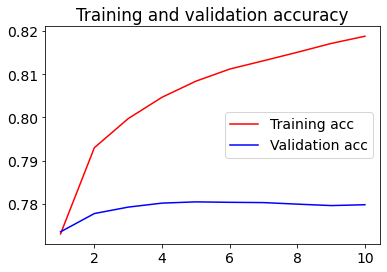

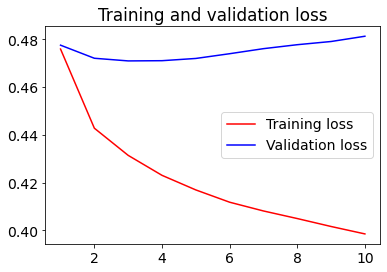

In [70]:
# Visualize accuracy and loss for train and validation data

acc = history4.history['accuracy']
val_acc = history4.history['val_accuracy']
loss = history4.history['loss']
val_loss = history4.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')
plt.legend()

plt.show()

In [71]:
model_4.evaluate(X_test, y_test)

5000/5000 [==============================] - 26s 5ms/step - loss: 0.4793 - accuracy: 0.7804


[0.4793461561203003, 0.7803687453269958]

In [72]:
model_4.evaluate(X_val, y_val)

9000/9000 [==============================] - 46s 5ms/step - loss: 0.4813 - accuracy: 0.7798


[0.4813162386417389, 0.7798159718513489]

In [73]:
res4 = model_4.predict(X_test)

tres = 0.5
res4 = (res4 > tres)
res4 = res4.astype(int)
res4

array([[0],
       [0],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [74]:
print(classification_report(y_test, res4))

              precision    recall  f1-score   support

           0       0.80      0.75      0.77     80000
           1       0.77      0.81      0.79     80000

    accuracy                           0.78    160000
   macro avg       0.78      0.78      0.78    160000
weighted avg       0.78      0.78      0.78    160000



### Model 5

In [19]:
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorization(inputs)
x = embedding(x)
x = SpatialDropout1D(0.1)(x)
x = Conv1D(64, 5, activation='selu')(x)
x = Bidirectional(LSTM(64, dropout=0.1))(x)
x = Dense(128, activation='selu')(x)
x = Dropout(0.1)(x)
x = Dense(64, activation='selu')(x)
x = Dropout(0.1)(x)
x = Dense(32, activation='selu')(x)
x = Dropout(0.1)(x)
x = Dense(16, activation='selu')(x)
outputs = Dense(1, activation='sigmoid')(x)
model_5 = tf.keras.Model(inputs, outputs, name='model_5') 

In [20]:
model_5.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 30)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 30, 128)           12800000  
                                                                 
 spatial_dropout1d (SpatialD  (None, 30, 128)          0         
 ropout1D)                                                       
                                                                 
 conv1d (Conv1D)             (None, 26, 64)            41024     
                                                                 
 bidirectional (Bidirectiona  (None, 128)              6604

In [21]:
model_5.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.000001), metrics=['accuracy'])

history5 = model_5.fit(train, batch_size = 64, epochs=10, validation_data=val)

Epoch 1/10
23040/23040 [==============================] - 494s 21ms/step - loss: 0.6786 - accuracy: 0.5667 - val_loss: 0.6367 - val_accuracy: 0.6590
Epoch 2/10
23040/23040 [==============================] - 488s 21ms/step - loss: 0.6050 - accuracy: 0.6723 - val_loss: 0.5662 - val_accuracy: 0.7084
Epoch 3/10
23040/23040 [==============================] - 490s 21ms/step - loss: 0.5632 - accuracy: 0.7089 - val_loss: 0.5405 - val_accuracy: 0.7282
Epoch 4/10
23040/23040 [==============================] - 488s 21ms/step - loss: 0.5421 - accuracy: 0.7262 - val_loss: 0.5251 - val_accuracy: 0.7395
Epoch 5/10
23040/23040 [==============================] - 490s 21ms/step - loss: 0.5284 - accuracy: 0.7370 - val_loss: 0.5145 - val_accuracy: 0.7473
Epoch 6/10
23040/23040 [==============================] - 490s 21ms/step - loss: 0.5184 - accuracy: 0.7445 - val_loss: 0.5065 - val_accuracy: 0.7531
Epoch 7/10
23040/23040 [==============================] - 489s 21ms/step - loss: 0.5105 - accuracy: 0.7501

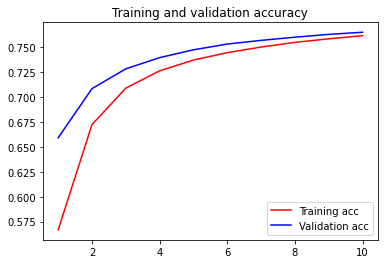

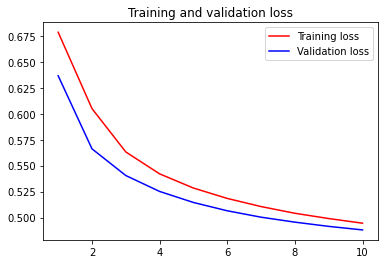

In [22]:
# Visualize accuracy and loss for train and validation data

acc = history5.history['accuracy']
val_acc = history5.history['val_accuracy']
loss = history5.history['loss']
val_loss = history5.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')
plt.legend()

plt.show()

In [23]:
model_5.evaluate(X_test, y_test)

5000/5000 [==============================] - 24s 5ms/step - loss: 0.4874 - accuracy: 0.7655


[0.4874148964881897, 0.7654812335968018]

In [24]:
model_5.evaluate(X_val, y_val)

9000/9000 [==============================] - 44s 5ms/step - loss: 0.4880 - accuracy: 0.7649


[0.4880334734916687, 0.7649132013320923]

In [25]:
res5 = model_5.predict(X_test)

tres = 0.5
res5 = (res5 > tres)
res5 = res5.astype(int)
res5

array([[0],
       [0],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [26]:
print(classification_report(y_test, res5))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76     80000
           1       0.76      0.78      0.77     80000

    accuracy                           0.77    160000
   macro avg       0.77      0.77      0.77    160000
weighted avg       0.77      0.77      0.77    160000



# Model Inference

For model inference, i will make a new data that contains 4 sentences. The new data then will be predicted by the model to predict whethe the sentence in the new data is positive or negative. 

Result :

0 = Negative

1 = Positive

In [63]:
new_data = [
    "I am sooo tired that i wanna die like right now",
    "So blessed, thanks god",
    "YAY my mother finally gave a car to use",
    "can you all just dissapear ? i'm sick of this"
]

result5 = model_5.predict(new_data)

print("---Probability---")
print(result5)

tres = 0.5 # Set the treshold, if the probability is higher than 0.5 , the sentence is positive
result5 = (result5 > tres)
result5 = result5.astype(int)
print("---Result---")
print(result5)

print("---Final Result---")
for i in result5 :
    if i == 0:
        print('This sentence is a Negative Sentence')
    else:
        print('This sentence is a Positive Sentence')

---Probability---
[[0.23501578]
 [0.72731835]
 [0.85845506]
 [0.09498516]]
---Result---
[[0]
 [1]
 [1]
 [0]]
---Final Result---
This sentence is a Negative Sentence
This sentence is a Positive Sentence
This sentence is a Positive Sentence
This sentence is a Negative Sentence


# Analysis & Conclusion

### Analysis

To obtain the best result, i made and trained several model. I made one base model and five other models to optimize the result. Now let's see from the value of the score, i'll focus on the accuracy and loss for starter.

All the optimized models trained, have accuracy score between 77-78%, pretty much the same, while the base model gave 75% accuracy. 

As for the loss, for several models, the loss is increasing or tend to stagnant. For base model, the loss is about 75%, it's very high. And the optimized model gave about 47-55 % loss.

Then, our case is sentiment analysis. I want to know whether the sentence is negative or positive. And in this case, we have 2 msitakes, False Positive ( Actual Negative, Predicted Positive) and False Positive (Actual Positive, Predicted Negative). In my opinion, we need to minimize the False Positive, so we need the model that has a high recall score.

To determine the best model, i will decide based the score and the plot between train and validation data.

    Score :

    - Low Loss
    - High Accuracy
    - High Recall
    
    Plot :
    
    - Decreasing Loss
    - Increasing Accuracy
    - Narrow gap between train and validation line plot

### Conclusion

Based on the analysis, the model that has all the criteria is model 5. With 48% loss, 77% accuracy, and 78% recall score. As from the plot, the loss is decreasing while the accuracy is increasing for both the train and validation data, it also has a narrow gap between the line plot of train and validation. 

# Model Saving

In [43]:
filepath = 'C:/Users/Fitrasari/Documents/Phase2/ML2/savedmodel.tf'
model_5.save_weights( filepath, save_format = 'tf' )

In [44]:
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorization(inputs)
x = embedding(x)
x = SpatialDropout1D(0.1)(x)
x = Conv1D(64, 5, activation='selu')(x)
x = Bidirectional(LSTM(64, dropout=0.1))(x)
x = Dense(128, activation='selu')(x)
x = Dropout(0.1)(x)
x = Dense(64, activation='selu')(x)
x = Dropout(0.1)(x)
x = Dense(32, activation='selu')(x)
x = Dropout(0.1)(x)
x = Dense(16, activation='selu')(x)
outputs = Dense(1, activation='sigmoid')(x)
svmodel= tf.keras.Model(inputs, outputs, name='saved_model') 

In [45]:
svmodel.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.000001), metrics=['accuracy'])

In [46]:
svmodel.load_weights(filepath)

In [47]:
new_data = [
    "I am sooo tired that i wanna die like right now",
    "So blessed, thanks god",
    "YAY my mother finally gave a car to use",
    "can you all just dissapear ? i'm sick of this"
]

hsl = svmodel.predict(new_data)

print(hsl)

tres = 0.5
hsl = (hsl > tres)
hsl = hsl.astype(int)
print(hsl)

[[0.23501578]
 [0.72731835]
 [0.85845506]
 [0.09498516]]
[[0]
 [1]
 [1]
 [0]]
